In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CancerSurvival.csv')

In [3]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


In [4]:
# format columns name
def format_column_names(df):
    """
    Format all column names in a DataFrame to snake_case.

    Parameters:
        df (pandas.DataFrame): DataFrame whose column names are to be formatted.

    Returns:
        pandas.DataFrame: DataFrame with column names formatted to snake_case.
    """
    formatted_columns = [col.replace(' ', '_').lower() for col in df.columns]
    df.columns = formatted_columns
    return df

In [5]:
df = format_column_names(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 334 non-null    int64  
 1   gender              334 non-null    object 
 2   protein1            334 non-null    float64
 3   protein2            334 non-null    float64
 4   protein3            334 non-null    float64
 5   protein4            334 non-null    float64
 6   tumour_stage        334 non-null    object 
 7   histology           334 non-null    object 
 8   er_status           334 non-null    object 
 9   pr_status           334 non-null    object 
 10  her2_status         334 non-null    object 
 11  surgery_type        334 non-null    object 
 12  date_of_surgery     334 non-null    object 
 13  date_of_last_visit  317 non-null    object 
 14  patient_status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [10]:
df.dropna(inplace=True)

In [14]:
df.dtypes

age                     int64
gender                 object
protein1              float64
protein2              float64
protein3              float64
protein4              float64
tumour_stage           object
histology              object
er_status              object
pr_status              object
her2_status            object
surgery_type           object
date_of_surgery        object
date_of_last_visit     object
patient_status         object
dtype: object

In [15]:
df['date_of_last_visit'] = pd.to_datetime(df['date_of_surgery'], format='%d-%b-%y')

In [16]:
df['date_of_surgery'] = pd.to_datetime(df['date_of_surgery'], format='%d-%b-%y')

In [12]:
df.apply(lambda col: col.unique())

age                   [36, 43, 69, 56, 84, 53, 77, 40, 71, 72, 75, 5...
gender                                                   [FEMALE, MALE]
protein1              [0.080353, -0.42032, 0.21398, 0.34509, 0.22155...
protein2              [0.42638, 0.57807, 1.3114, -0.21147, 1.9068, 1...
protein3              [0.54715, 0.61447, -0.32747, -0.19304, 0.52045...
protein4              [0.27368, -0.031505, -0.23426, 0.12427, -0.311...
tumour_stage                                               [III, II, I]
histology             [Infiltrating Ductal Carcinoma, Mucinous Carci...
er_status                                                    [Positive]
pr_status                                                    [Positive]
her2_status                                        [Negative, Positive]
surgery_type          [Modified Radical Mastectomy, Lumpectomy, Othe...
date_of_surgery       [15-Jan-17, 26-Apr-17, 8-Sep-17, 25-Jan-17, 6-...
date_of_last_visit    [19-Jun-17, 9-Nov-18, 9-Jun-18, 12-Jul-17,

In [18]:
# Define a dictionary to map Roman numerals to numerical values
roman_to_numerical = {'III': 0, 'II': 1, 'I': 2}

# Assuming your DataFrame is named df and the column to map is named 'tumour_stage'
df['tumour_stage'] = df['tumour_stage'].map(roman_to_numerical)

# EDA

In [22]:
categorical_columns = ['gender','tumour_stage','histology','er_status','pr_status','her2_status','surgery_type','patient_status']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

## Univariate

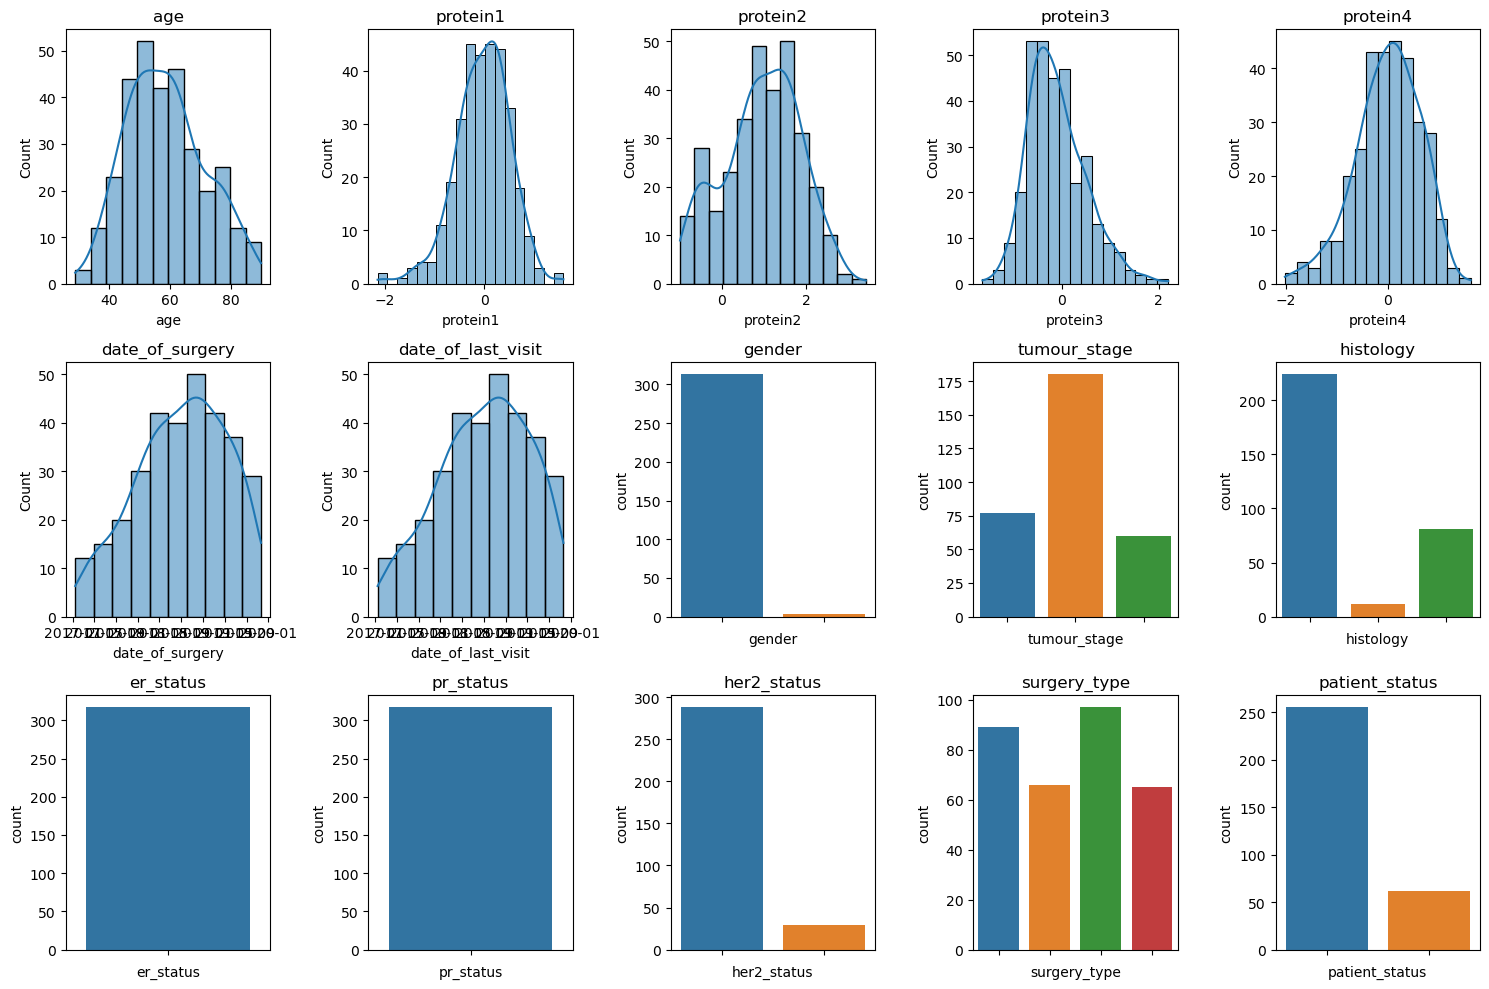

In [26]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

for i, column in enumerate(categorical_columns):
    row = (i + len(numerical_columns)) // num_cols
    col = (i + len(numerical_columns)) % num_cols
    sns.countplot(data=df, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)
    axes[row][col].set_xticklabels([])  # Remove x-axis labels

plt.tight_layout()
plt.show()


## Bivariate

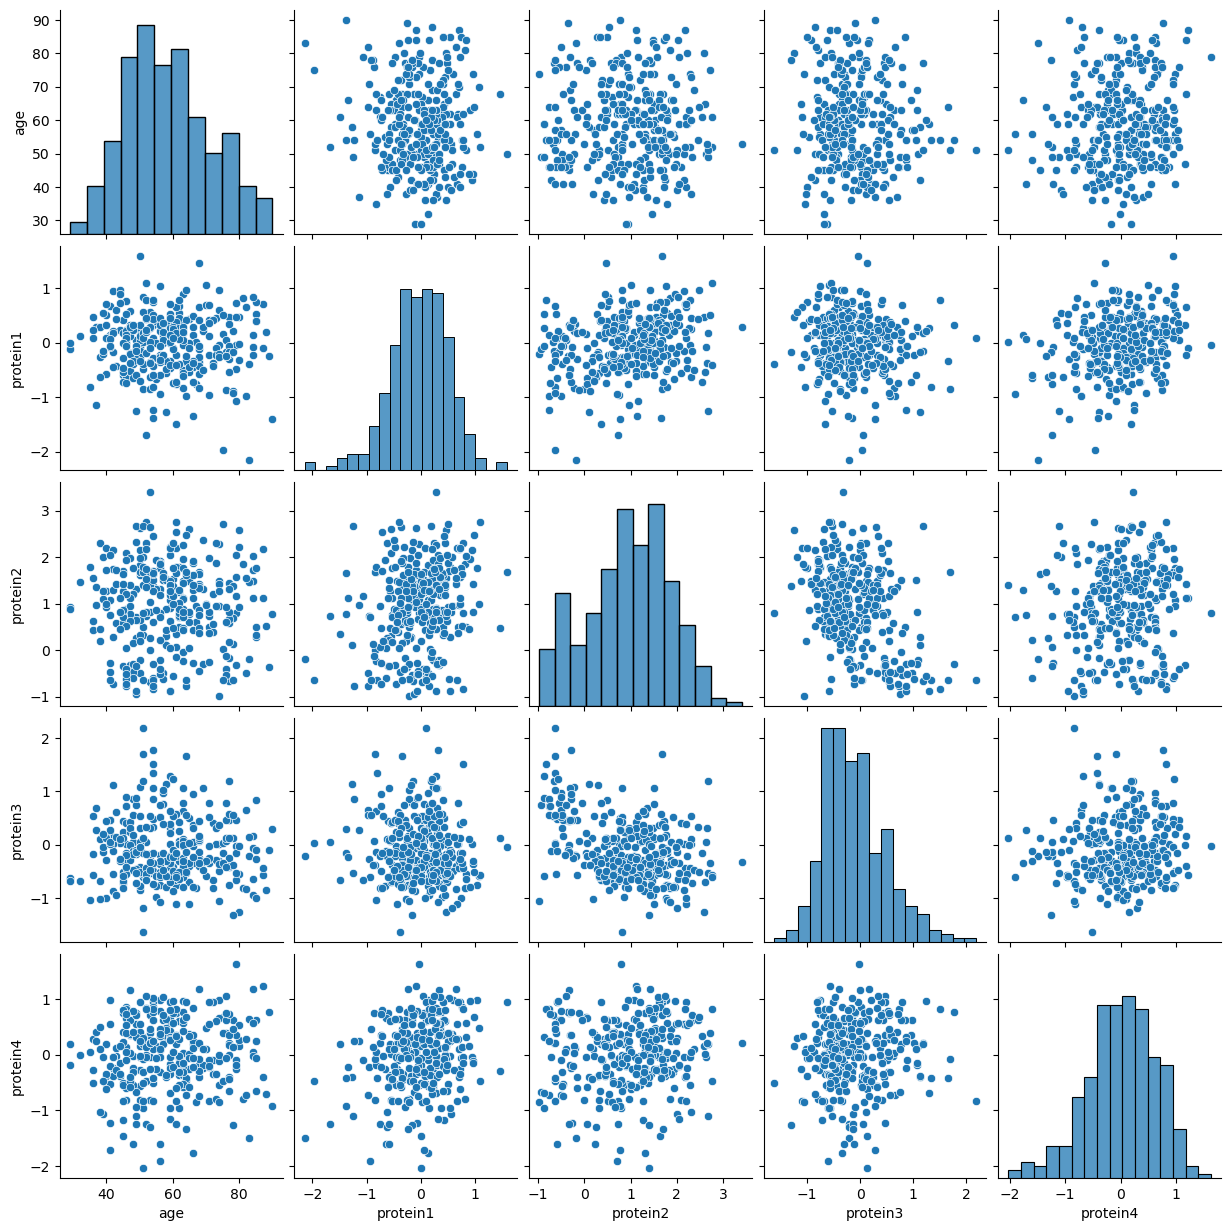

In [27]:
sns.pairplot(df[numerical_columns])

In [28]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=3, ncols=num_plots // 2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()


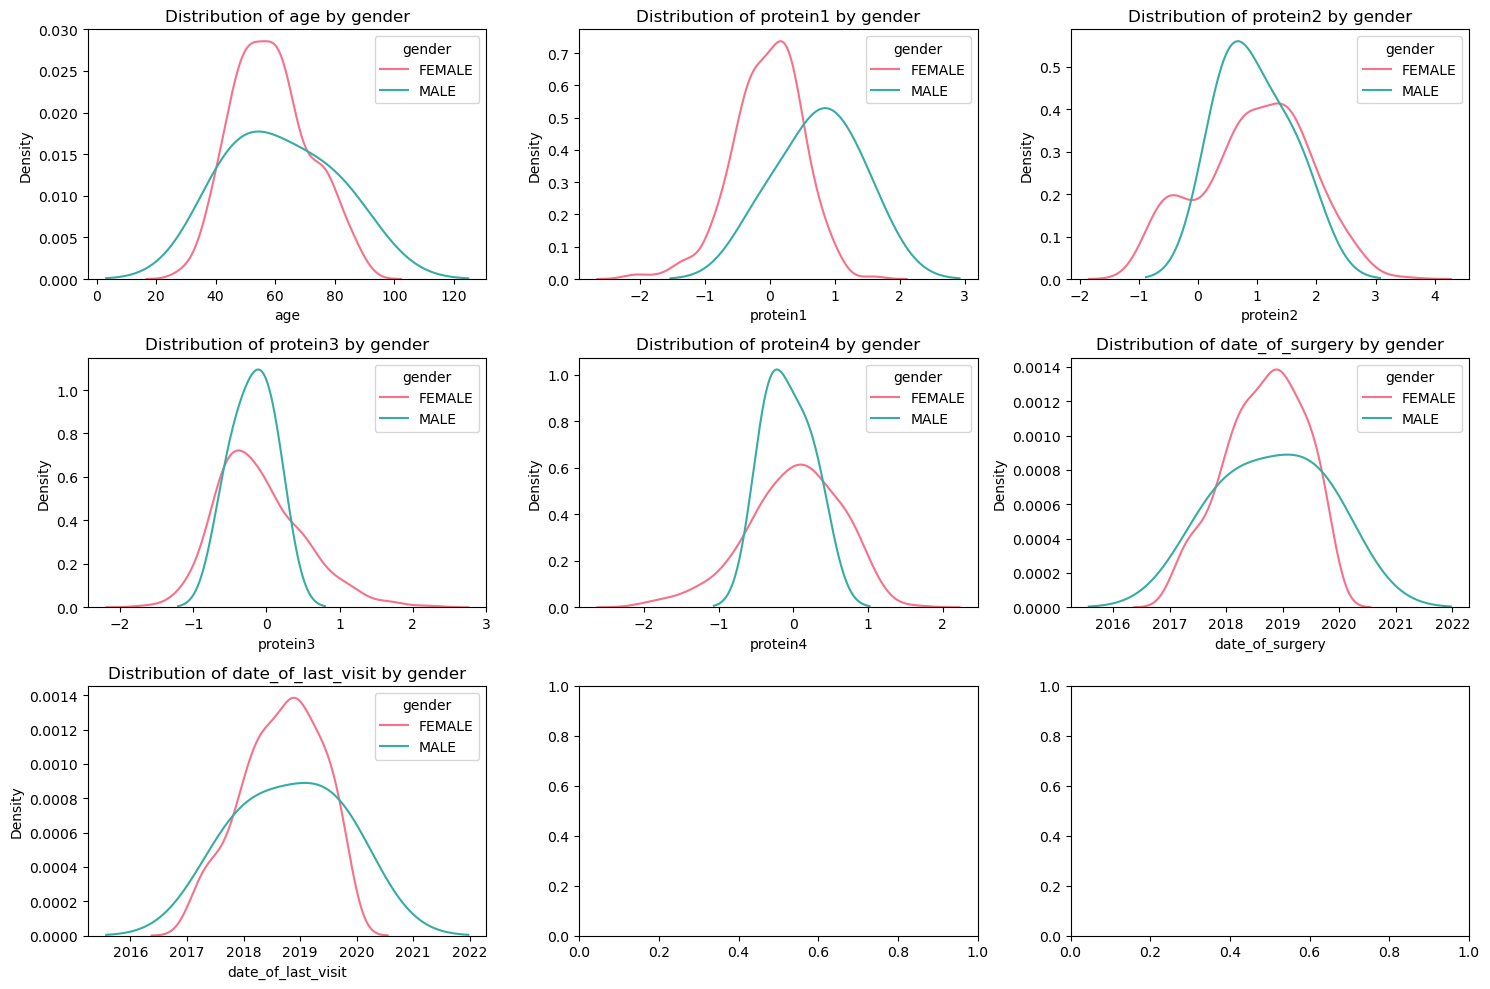

In [29]:
plot_distribution_curves(df, numerical_columns, 'gender')

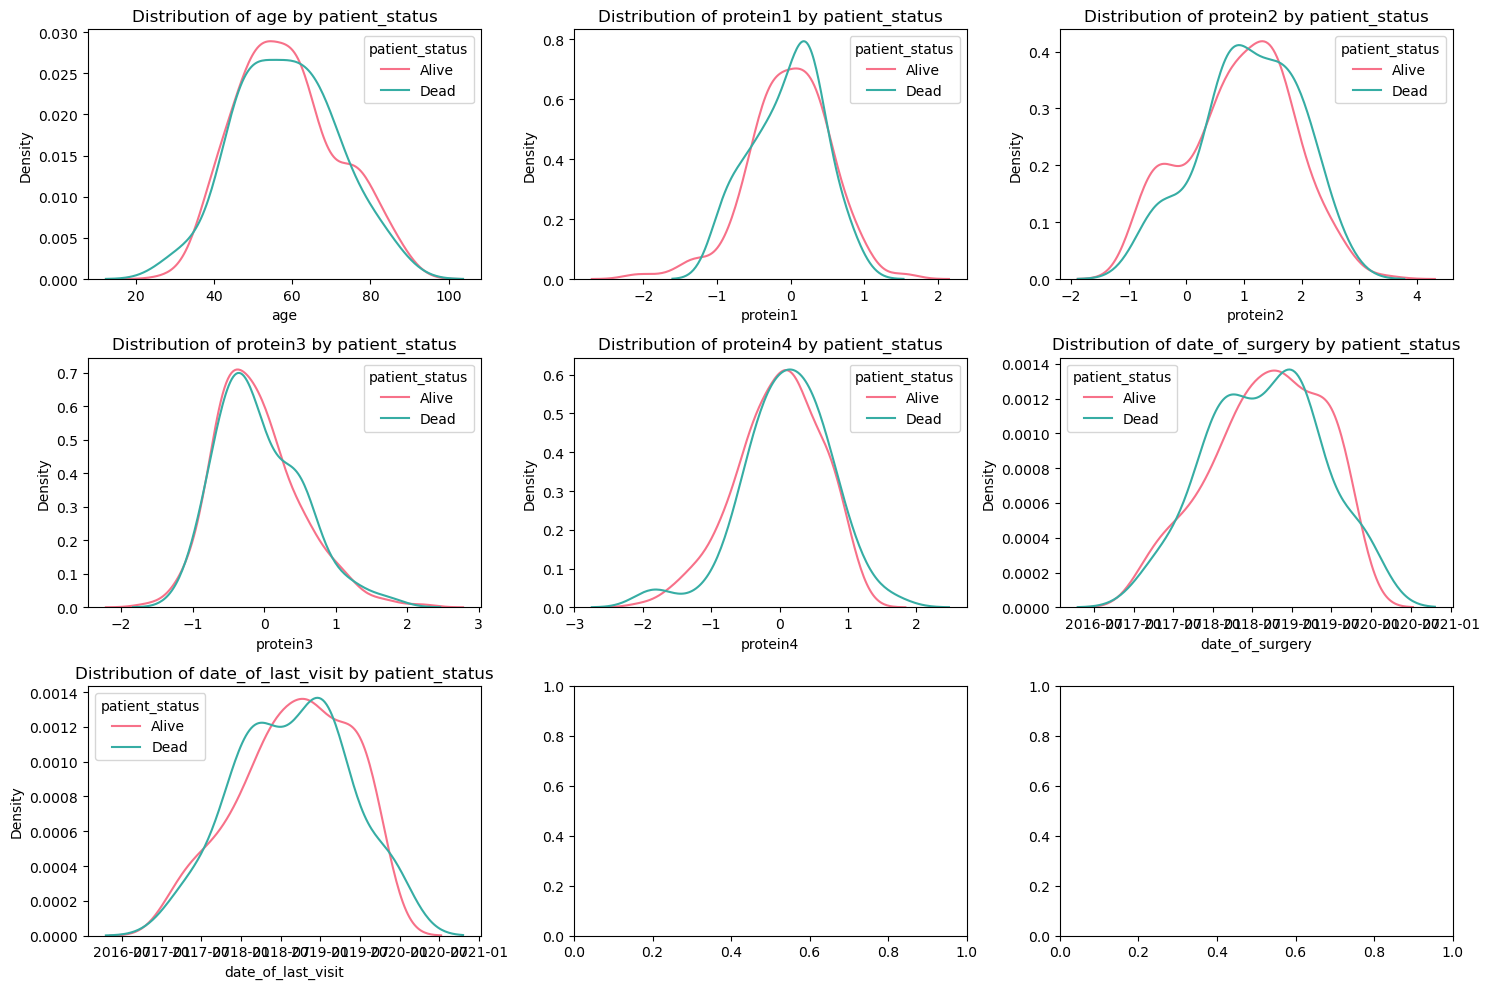

In [33]:
plot_distribution_curves(df, numerical_columns, 'patient_status')

# Multivariate

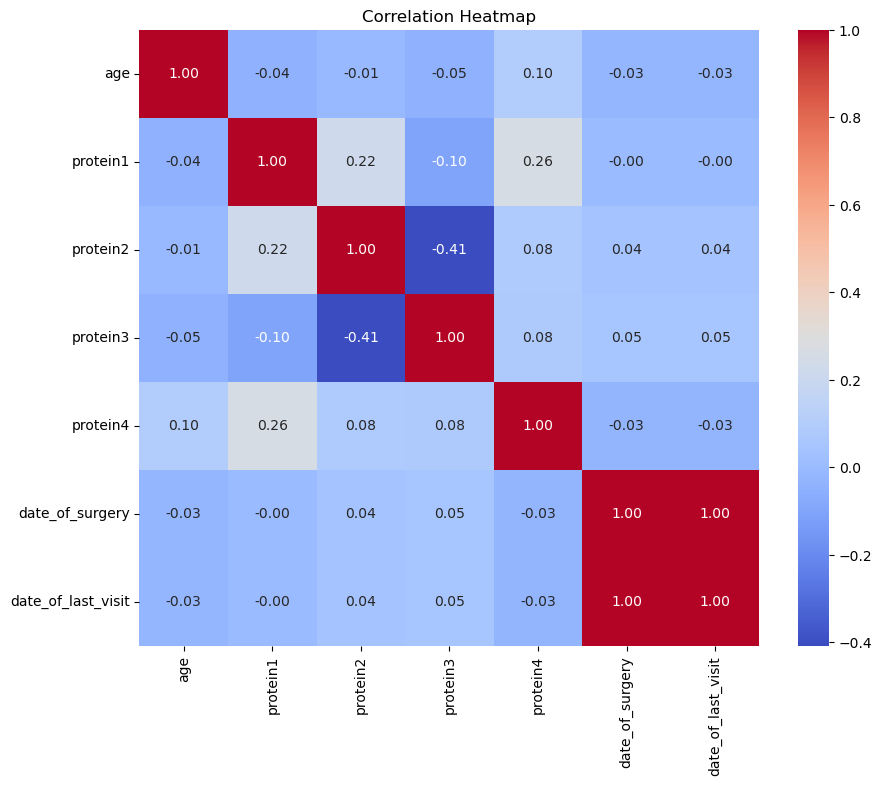

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Kmeans model

In [34]:
df.head()

,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er_status,pr_status,her2_status,surgery_type,date_of_surgery,date_of_last_visit,patient_status
0,36,FEMALE,0.080353,0.42638,0.54715,0.273680,0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-01-15,Alive
1,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,1,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2017-04-26,Dead
2,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2017-09-08,Alive
3,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-01-25,Alive
4,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2017-05-06,Dead


In [35]:
# Define a dictionary to map gender values to numerical values
gender_mapping = {'FEMALE': 0, 'MALE': 1}

# Map the values in the 'gender' column using the defined mapping
df['gender'] = df['gender'].map(gender_mapping)

In [36]:
# Replace 'Positive' with 1 in both columns
df['er_status'] = df['er_status'].replace('Positive', 1)
df['pr_status'] = df['pr_status'].replace('Positive', 1)

In [37]:
# Define a dictionary to map 'Positive' to 1 and 'Negative' to 0
her2_mapping = {'Positive': 1, 'Negative': 0}

# Map the values in the 'her2_status' column using the defined mapping
df['her2_status'] = df['her2_status'].map(her2_mapping)

In [39]:
df['visit_year'] = df['date_of_last_visit'].dt.year
df['visit_month'] = df['date_of_last_visit'].dt.month
df['visit_day'] = df['date_of_last_visit'].dt.day


In [40]:
df['surgery_year'] = df['date_of_surgery'].dt.year
df['surgery_month'] = df['date_of_surgery'].dt.month
df['surgery_day'] = df['date_of_surgery'].dt.day


In [41]:
df.drop(columns=['date_of_surgery', 'date_of_last_visit'])

,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er_status,pr_status,her2_status,surgery_type,patient_status,visit_year,visit_month,visit_day,surgery_year,surgery_month,surgery_day
0,36,0,0.080353,0.42638,0.54715,0.273680,0,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,Alive,2017,1,15,2017,1,15
1,43,0,-0.420320,0.57807,0.61447,-0.031505,1,Mucinous Carcinoma,1,1,0,Lumpectomy,Dead,2017,4,26,2017,4,26
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,Infiltrating Ductal Carcinoma,1,1,0,Other,Alive,2017,9,8,2017,9,8
3,56,0,0.345090,-0.21147,-0.19304,0.124270,1,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,Alive,2017,1,25,2017,1,25
4,56,0,0.221550,1.90680,0.52045,-0.311990,1,Infiltrating Ductal Carcinoma,1,1,0,Other,Dead,2017,5,6,2017,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36,0,0.231800,0.61804,-0.55779,-0.517350,0,Infiltrating Ductal Carcinoma,1,1,1,Simple Mastectomy,Dead,2019,11,11,2019,11,11
330,44,1,0.732720,1.11170,-0.26952,-0.354920,1,Infiltrating Lobular Carcinoma,1,1,0,Other,Dead,2019,11,1,2019,11,1
331,61,0,-0.719470,2.54850,-0.15024,0.339680,1,Infiltrating Ductal Carcinoma,1,1,0,Lumpectomy,Dead,2019,11,11,2019,11,11
332,79,0,0.479400,2.05590,-0.53136,-0.188480,2,Infiltrating Ductal Carcinoma,1,1,1,Lumpectomy,Dead,2019,11,21,2019,11,21


In [42]:
def one_hot_encode(df):
    """
    One-hot encodes object-type columns in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with object-type columns one-hot encoded.
    """
    # Get object-type columns
    object_cols = df.select_dtypes(include=['object']).columns

    # One-hot encode object-type columns
    df_encoded = pd.get_dummies(df, columns=object_cols)

    return df_encoded

In [50]:
# Assuming your DataFrame is named df
df = one_hot_encode(df)

In [51]:
df

,age,gender,protein1,protein2,protein3,protein4,tumour_stage,er_status,pr_status,her2_status,...,surgery_day,histology_Infiltrating Ductal Carcinoma,histology_Infiltrating Lobular Carcinoma,histology_Mucinous Carcinoma,surgery_type_Lumpectomy,surgery_type_Modified Radical Mastectomy,surgery_type_Other,surgery_type_Simple Mastectomy,patient_status_Alive,patient_status_Dead
0,36,0,0.080353,0.42638,0.54715,0.273680,0,1,1,0,...,15,True,False,False,False,True,False,False,True,False
1,43,0,-0.420320,0.57807,0.61447,-0.031505,1,1,1,0,...,26,False,False,True,True,False,False,False,False,True
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,1,1,0,...,8,True,False,False,False,False,True,False,True,False
3,56,0,0.345090,-0.21147,-0.19304,0.124270,1,1,1,0,...,25,True,False,False,False,True,False,False,True,False
4,56,0,0.221550,1.90680,0.52045,-0.311990,1,1,1,0,...,6,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36,0,0.231800,0.61804,-0.55779,-0.517350,0,1,1,1,...,11,True,False,False,False,False,False,True,False,True
330,44,1,0.732720,1.11170,-0.26952,-0.354920,1,1,1,0,...,1,False,True,False,False,False,True,False,False,True
331,61,0,-0.719470,2.54850,-0.15024,0.339680,1,1,1,0,...,11,True,False,False,True,False,False,False,False,True
332,79,0,0.479400,2.05590,-0.53136,-0.188480,2,1,1,1,...,21,True,False,False,True,False,False,False,False,True


In [52]:
# Get column names with int32 dtype
int32_columns = df.select_dtypes(include=['int32']).columns

# Convert int32 to int64
df[int32_columns] = df[int32_columns].astype('int64')

In [53]:
df = df.replace({True: 1, False: 0})

In [54]:
df.dtypes

age                                                  int64
gender                                               int64
protein1                                           float64
protein2                                           float64
protein3                                           float64
protein4                                           float64
tumour_stage                                         int64
er_status                                            int64
pr_status                                            int64
her2_status                                          int64
date_of_surgery                             datetime64[ns]
date_of_last_visit                          datetime64[ns]
visit_year                                           int64
visit_month                                          int64
visit_day                                            int64
surgery_year                                         int64
surgery_month                                        int

In [59]:
df.drop(columns = ['date_of_surgery','date_of_last_visit'], inplace= True)

In [60]:
df.dtypes

age                                           int64
gender                                        int64
protein1                                    float64
protein2                                    float64
protein3                                    float64
protein4                                    float64
tumour_stage                                  int64
er_status                                     int64
pr_status                                     int64
her2_status                                   int64
visit_year                                    int64
visit_month                                   int64
visit_day                                     int64
surgery_year                                  int64
surgery_month                                 int64
surgery_day                                   int64
histology_Infiltrating Ductal Carcinoma       int64
histology_Infiltrating Lobular Carcinoma      int64
histology_Mucinous Carcinoma                  int64
surgery_type

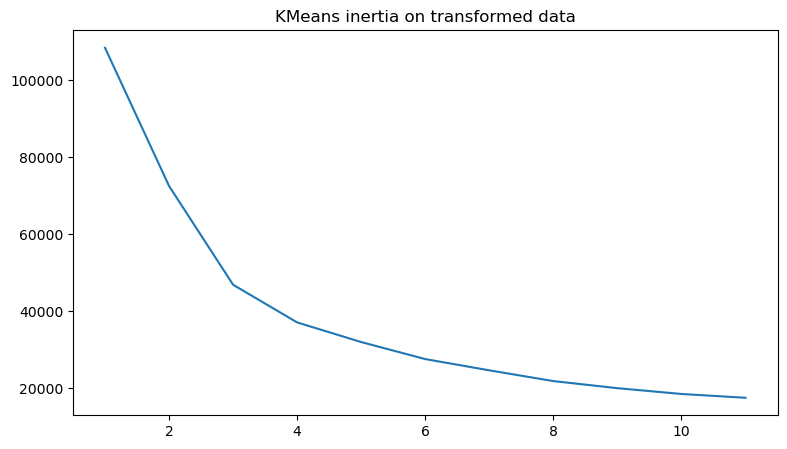

In [61]:
#Determine the number of clusters 
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia_t.append(km.inertia_)

#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')
plt.show()

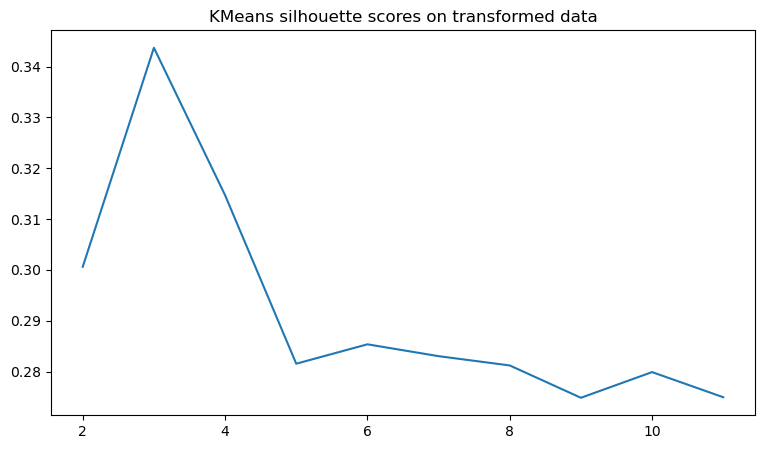

In [62]:
silhouette_scores = []

for i in range(2, 12):  # Considering clusters from 2 to 11
    km = KMeans(n_clusters=i)
    km.fit(df)
    silhouette_scores.append(silhouette_score(df, km.labels_))

#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(2,12), y=silhouette_scores)
plt.title('KMeans silhouette scores on transformed data')
plt.show()

In [ ]:
# Chose number of cluster = 3

In [64]:
#Build the model
kmeans3=KMeans(n_clusters=3,n_init=10,max_iter=500)
kmeans3.fit(df)

KMeans(max_iter=500, n_clusters=3, n_init=10)

In [65]:
#Add the clusters into the initial dataframe (centers)
df['clusters']=kmeans3.labels_ 

# take a look at the cluster center
kmeans3.cluster_centers_

array([[ 7.40602410e+01,  2.40963855e-02,  1.67625060e-02,
         9.27076771e-01, -1.38111371e-01,  6.81267470e-02,
         1.06024096e+00,  1.00000000e+00,  1.00000000e+00,
         7.22891566e-02,  2.01818072e+03,  6.14457831e+00,
         2.05542169e+01,  2.01818072e+03,  6.14457831e+00,
         2.05542169e+01,  7.46987952e-01,  2.40963855e-01,
         1.20481928e-02,  2.89156627e-01,  2.16867470e-01,
         2.53012048e-01,  2.40963855e-01,  8.19277108e-01,
         1.80722892e-01],
       [ 4.78800000e+01,  1.00000000e-02,  3.66063344e-02,
         9.43043110e-01, -1.15945132e-01, -4.76757200e-02,
         8.50000000e-01,  1.00000000e+00,  1.00000000e+00,
         1.30000000e-01,  2.01805000e+03,  6.77000000e+00,
         2.18200000e+01,  2.01805000e+03,  6.77000000e+00,
         2.18200000e+01,  6.20000000e-01,  3.10000000e-01,
         7.00000000e-02,  1.40000000e-01,  3.80000000e-01,
         2.70000000e-01,  2.10000000e-01,  7.60000000e-01,
         2.40000000e-01],
    

In [67]:
import plotly.express as px

# Assuming df is your DataFrame with the specified columns

fig = px.scatter_3d(df, x='age', y='protein2', z='protein3', color='clusters',
                    symbol='clusters', opacity=0.7, size_max=10,
                    title='3D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()
